<a href="https://colab.research.google.com/github/Anjasfedo/Learning-TensorFlow/blob/main/tensorflow2_in_30_days/Chapter1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-1 Example: Modeling Procedure for Structured Data

## 1. Data Preparation
Use Titanic dataset to predict given passanger survived after Titanic hit the iceburg, according to their personal information

Use DataFrame of Pandas to pre-process the structured data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

In [19]:
FONTSIZE = 15

In [2]:
dftrain_raw = pd.read_csv('https://raw.githubusercontent.com/lyhue1991/eat_tensorflow2_in_30_days/master/data/titanic/train.csv')
dftest_raw = pd.read_csv('https://raw.githubusercontent.com/lyhue1991/eat_tensorflow2_in_30_days/master/data/titanic/test.csv')

dftrain_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S


In [3]:
dftrain_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          566 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        168 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.9+ KB


In [4]:
dftest_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Name         179 non-null    object 
 4   Sex          179 non-null    object 
 5   Age          148 non-null    float64
 6   SibSp        179 non-null    int64  
 7   Parch        179 non-null    int64  
 8   Ticket       179 non-null    object 
 9   Fare         179 non-null    float64
 10  Cabin        36 non-null     object 
 11  Embarked     179 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 16.9+ KB


In [7]:
dftrain_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            146
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          544
Embarked         2
dtype: int64

In [8]:
dftest_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             31
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          143
Embarked         0
dtype: int64

Explaantion each column:
- PassangerId: indexing of data [discarded]
- Survived: death (0) or survived (1) [y labels]
- Pclass: class of ticket (1, 2, 3) [convert to one-hot encoding]
- Name: name of passanger [discarded]
- Age: age of passanger (partly missing) [numerical feature, should add "whether age is missing"]
- SibSp: number of siblings (integer) [numerical feature]
- Parch: number of parents/children (integer) [numerical feature]
- Ticket: ticket number [discarded]
- Fare: ticket price (float, between 0 - 500) [numerical feature]
- Cabin: cabin where passanger located (partly missing) [should add "whether cabin is missing"]
- Embarked: which port passanger embarked (partly missing) [convert to one-hot encoding, four dimensions (S, C, Q, nan)]

Data visualization for initial EDA (Explarotary Data Analysis)

Survival label distribution:

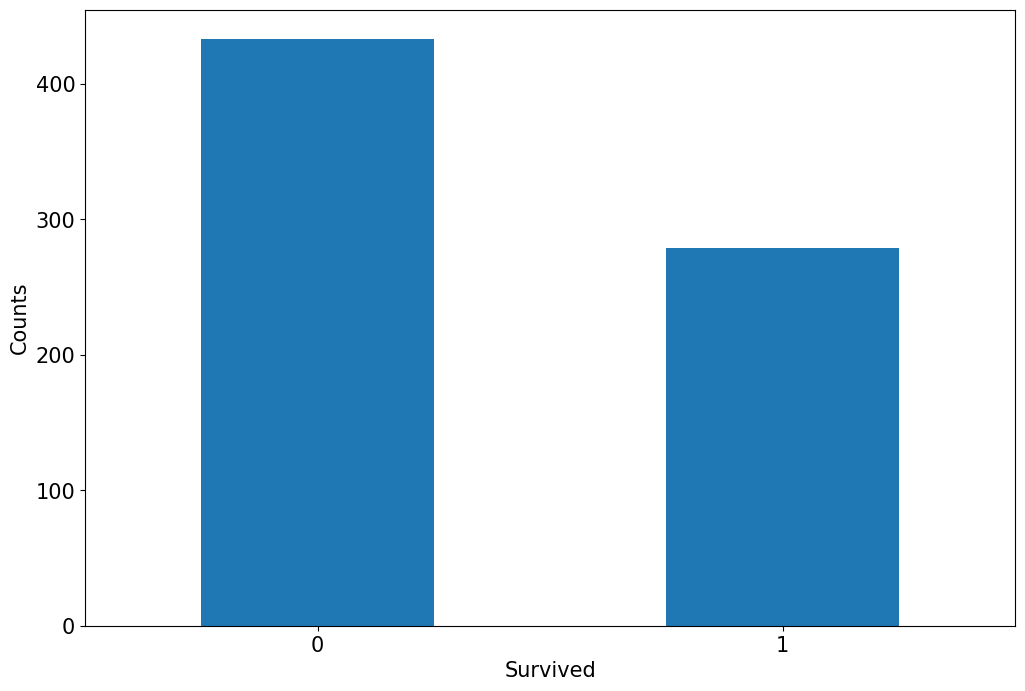

In [20]:
ax = dftrain_raw['Survived'].value_counts().plot(kind='bar',
                                                 figsize=(12, 8),
                                                 fontsize=FONTSIZE,
                                                 rot=0)
ax.set_ylabel('Counts',
              fontsize=FONTSIZE)
ax.set_xlabel('Survived',
              fontsize=FONTSIZE)

plt.show()

Age distrinbution:

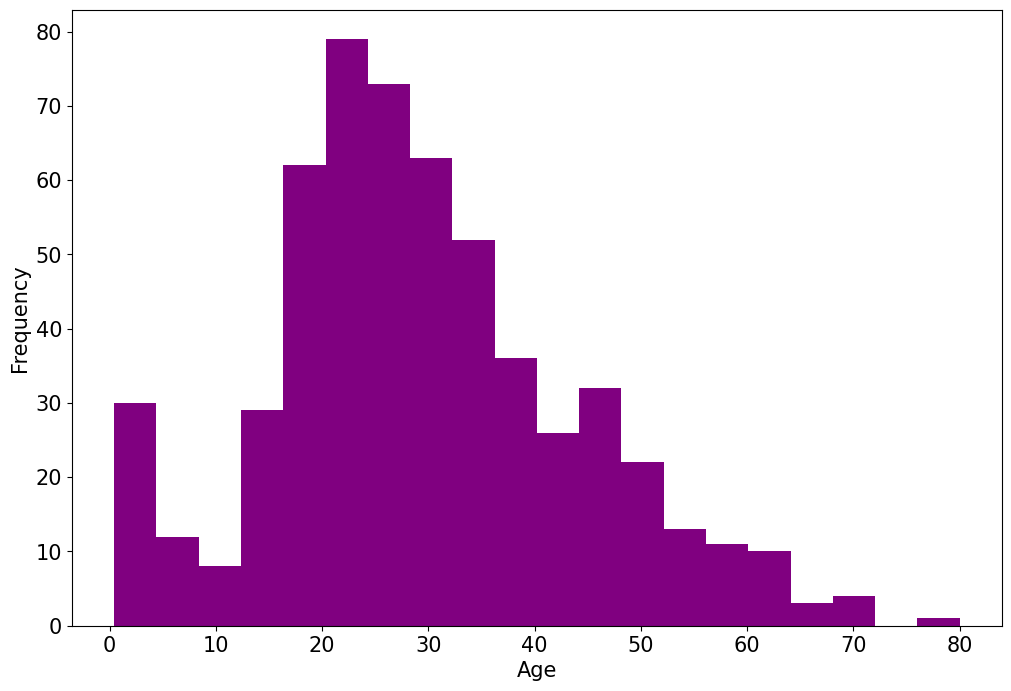

In [24]:
ax = dftrain_raw['Age'].plot(kind='hist',
                             bins=20,
                             color='purple',
                             figsize=(12,8),
                             fontsize=FONTSIZE)

ax.set_ylabel('Frequency',
              fontsize=FONTSIZE)
ax.set_xlabel('Age',
              fontsize=FONTSIZE)

plt.show()

Correlation between age & survival label:

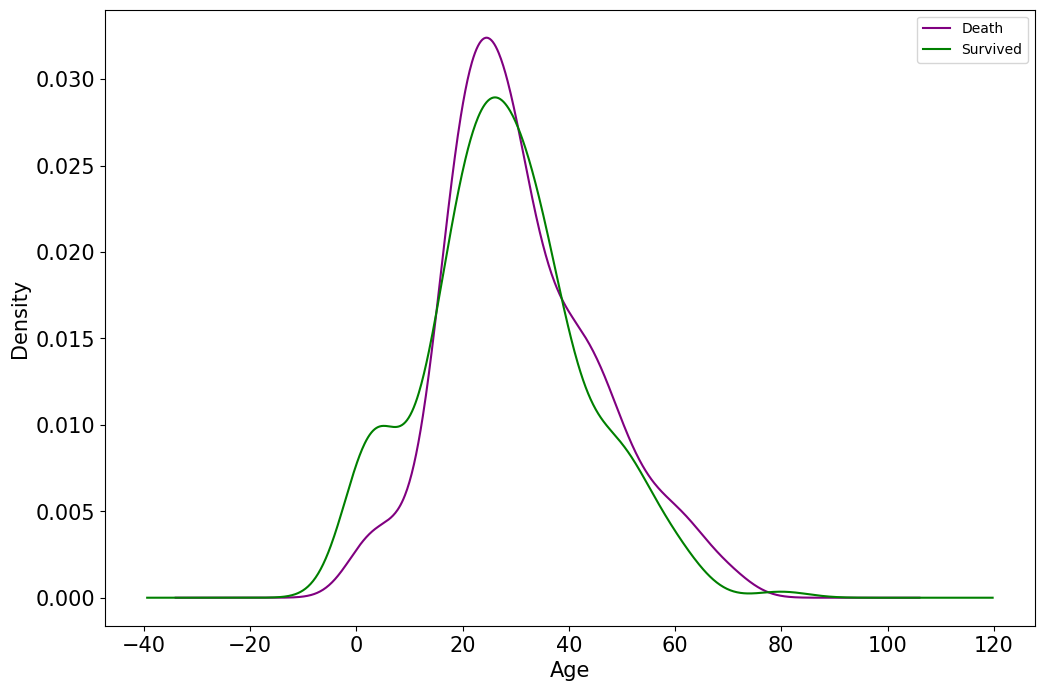

In [26]:
ax = dftrain_raw.query('Survived == 0')['Age'].plot(kind='density',
                                                    figsize=(12,8),
                                                    color='purple',
                                                    fontsize=FONTSIZE,
                                                    label='Death')
ax = dftrain_raw.query('Survived == 1')['Age'].plot(kind='density',
                                                    figsize=(12,8),
                                                    color='green',
                                                    fontsize=FONTSIZE,
                                                    label='Survived')

ax.legend()

ax.set_ylabel('Density',
              fontsize=FONTSIZE)
ax.set_xlabel('Age',
              fontsize=FONTSIZE)

plt.show()

Formal data pre-processing

In [47]:
def preprocessing(df_data):
  df_result = pd.DataFrame()

  # Pclass
  df_Pclass = pd.get_dummies(df_data['Pclass'], prefix='Pclass').astype('int32')
  # df_Pclass.columns = ['Pclass_' + str(x) for x in df_Pclass.columns]
  df_result = pd.concat([df_result, df_Pclass], axis=1)

  # Sex
  df_Sex = pd.get_dummies(df_data['Sex']).astype('int32')
  df_result = pd.concat([df_result, df_Sex], axis=1)

  # Age
  df_result['Age'] = df_data['Age'].fillna(0)
  df_result['Age_null'] = pd.isna(df_data['Age']).astype('int32')

  # SibSp
  df_result['SibSp'] = df_data['SibSp'].astype('int32')

  # Parch
  df_result['Parch'] = df_data['Parch'].astype('int32')

  # Fare
  df_result['Fare'] = df_data['Fare'].astype('float32')

  # Cabin
  df_result['Cabin_null'] = pd.isna(df_data['Cabin']).astype('int32')

  # Embarked
  df_Embarked = pd.get_dummies(df_data['Embarked'], dummy_na=True, prefix='Embarked').astype('int32')
  # df_Embarked.columns = ['Embarked_' + str(x) for x in df_Embarked.columns]
  df_result = pd.concat([df_result, df_Embarked], axis=1)

  return (df_result)

In [48]:
x_train = preprocessing(dftrain_raw)
y_train = dftrain_raw['Survived'].values

x_test = preprocessing(dftest_raw)
y_test = dftest_raw['Survived'].values

In [49]:
print(f'shape of x_train: {x_train.shape}')
print(f'shape of x_test: {x_test.shape}')

shape of x_train: (712, 15)
shape of x_test: (179, 15)


In [50]:
x_train.head()

,Pclass_1,Pclass_2,Pclass_3,female,male,Age,Age_null,SibSp,Parch,Fare,Cabin_null,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,0,0,1,55.0,0,0,0,30.500000,0,0,0,1,0
1,1,0,0,1,0,49.0,0,1,0,76.729202,0,1,0,0,0
2,0,1,0,1,0,36.0,0,0,0,13.000000,1,0,0,1,0
3,0,1,0,0,1,19.0,0,0,0,13.000000,1,0,0,1,0
4,0,0,1,0,1,14.0,0,4,1,39.687500,1,0,0,1,0


## 2. Model Definition

there is three way to modeling with keras APIs
- sequential modeling with `Sequential()`
- arbitary modeling with functional API
- customized modeling by inherit class `Model`

here the simples way: sequantial modeling with `Sequential()`

In [55]:
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(20,
                       activation='relu',
                       input_shape=(x_train.shape[1],)))
model.add(layers.Dense(10,
                       activation='relu'))
model.add(layers.Dense(1,
                       activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                320       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 541 (2.11 KB)
Trainable params: 541 (2.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3. Model Training

there three usual way to training the model
- use internal function fit
- use internal function train_on_batch
- customized training loop

here the simplist way: use internal function fit

In [56]:
# Use binary cross entropy loss function for binary classification problem
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['AUC'])

history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.2 # 20% train data will become validation data, the remaining 80% will be used for training the model
                    )

Epoch 1/30
9/9 [==============================] - 1s 46ms/step - loss: 3.0097 - auc: 0.5153 - val_loss: 2.1026 - val_auc: 0.5221
Epoch 2/30
9/9 [==============================] - 0s 8ms/step - loss: 2.0110 - auc: 0.4994 - val_loss: 1.4274 - val_auc: 0.5218
Epoch 3/30
9/9 [==============================] - 0s 8ms/step - loss: 1.1406 - auc: 0.5360 - val_loss: 0.9136 - val_auc: 0.5504
Epoch 4/30
9/9 [==============================] - 0s 9ms/step - loss: 0.7735 - auc: 0.5834 - val_loss: 0.7757 - val_auc: 0.5963
Epoch 5/30
9/9 [==============================] - 0s 9ms/step - loss: 0.7133 - auc: 0.6313 - val_loss: 0.6883 - val_auc: 0.6528
Epoch 6/30
9/9 [==============================] - 0s 9ms/step - loss: 0.6920 - auc: 0.6553 - val_loss: 0.6736 - val_auc: 0.6488
Epoch 7/30
9/9 [==============================] - 0s 8ms/step - loss: 0.6655 - auc: 0.6654 - val_loss: 0.6549 - val_auc: 0.6447
Epoch 8/30
9/9 [==============================] - 0s 7ms/step - loss: 0.6468 - auc: 0.6624 - val_loss: 

## 4. Model evaluation

evaluate model performance on training and validation dataset